In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Building Metadata.csv',
 'metco.ipynb',
 'Predictions.csv',
 'Task Description.docx',
 'Test Data.csv',
 'Training Data.csv']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading

In [114]:
train = pd.read_csv("Training Data.csv",sep = ';')
test = pd.read_csv("Test Data.csv",sep = ';')
preds = pd.read_csv("Predictions.csv",sep = ';')
building = pd.read_csv("Building Metadata.csv",sep = ';').sort_values(['series_id'])

In [6]:
train.head()

,series_id,timestamp,consumption,temperature
0,101869,2013-04-28T06:00:00+03:00,186668.524814,14.300000
1,100043,2017-11-22T15:00:00+02:00,70460.369717,NaN
2,103425,2016-04-20T09:00:00+03:00,67706.543361,4.333333
3,103425,2016-05-05T02:00:00+03:00,35042.519324,9.666667
4,101405,2015-10-14T08:00:00+03:00,29874.425364,NaN


In [15]:
train[train.series_id == 100003].sort_values('timestamp').tail()

,series_id,timestamp,consumption,temperature
252317,100003,2017-11-20T21:00:00+02:00,209192.368522,NaN
172798,100003,2017-11-20T22:00:00+02:00,203128.821608,NaN
348860,100003,2017-11-20T23:00:00+02:00,200097.048151,NaN
405086,100003,2017-11-21T00:00:00+02:00,200097.048151,NaN
285769,100003,2017-11-21T01:00:00+02:00,194033.501238,NaN


In [5]:
test.head()

,series_id,timestamp,consumption,temperature
0,102474,2014-07-22T03:00:00+03:00,20339.725446,24.275000
1,102857,2015-10-04T05:00:00+03:00,4672.240009,10.333333
2,100492,2014-08-14T12:00:00+03:00,57712.556284,31.000000
3,103628,2015-01-27T04:00:00+02:00,2662.731426,5.000000
4,100486,2015-03-08T05:00:00+02:00,38865.265925,7.000000


In [6]:
preds.head()

,pred_id,series_id,timestamp,temperature,consumption,prediction_window
0,461,101226,2016-03-22T08:00:00+02:00,11.000000,0.0,hourly
1,573,101672,2016-06-22T14:00:00+03:00,14.000000,0.0,hourly
2,662,100167,2016-03-23T12:00:00+02:00,NaN,0.0,hourly
3,802,101667,2017-12-05T02:00:00+02:00,20.835417,0.0,daily
4,3141,101042,2015-09-25T12:00:00+03:00,NaN,0.0,hourly


In [7]:
building.head()

,series_id,surface,base_temperature,monday_is_day_off,tuesday_is_day_off,wednesday_is_day_off,thursday_is_day_off,friday_is_day_off,saturday_is_day_off,sunday_is_day_off
991,100003,x-large,low,False,False,False,False,False,True,True
558,100004,x-large,low,False,False,False,False,False,True,True
639,100006,x-small,low,False,False,False,False,False,True,True
1054,100008,x-small,low,False,False,False,False,False,True,True
143,100010,x-small,low,False,False,False,False,False,True,True


# Data Interpretation

In [20]:
building.shape

(1383, 10)

In [35]:
building.series_id.nunique()

1383

In [27]:
train.series_id.nunique()

758

In [26]:
test.series_id.nunique()

625

In [32]:
preds.series_id.nunique()

625

In [33]:
preds.shape

(7529, 6)

In [34]:
test.shape

(111984, 4)

In [14]:
train.isna().sum()

series_id           0
timestamp           0
consumption         0
temperature    228689
dtype: int64

In [15]:
test.isna().sum()

series_id          0
timestamp          0
consumption        0
temperature    44916
dtype: int64

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509376 entries, 0 to 509375
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   series_id    509376 non-null  int64  
 1   timestamp    509376 non-null  object 
 2   consumption  509376 non-null  float64
 3   temperature  280687 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.5+ MB


In [83]:
datetime.datetime.utcnow()

datetime.datetime(2020, 6, 23, 8, 44, 46, 854570)

In [82]:
datetime.datetime.now()

datetime.datetime(2020, 6, 23, 14, 14, 18, 886200)

In [16]:
test[test.series_id == 100004].sort_values('timestamp').tail()

,series_id,timestamp,consumption,temperature
49247,100004,2015-07-03T22:00:00+03:00,412108.432183,33.666667
41700,100004,2015-07-03T23:00:00+03:00,447949.380015,31.800000
46383,100004,2015-07-04T00:00:00+03:00,411885.890350,31.333333
88293,100004,2015-07-04T01:00:00+03:00,346603.048444,29.666667
47256,100004,2015-07-04T02:00:00+03:00,331157.864389,25.700000


In [17]:
preds[preds.series_id == 100004].sort_values('timestamp').tail()

,pred_id,series_id,timestamp,temperature,consumption,prediction_window
803,2614,100004,2015-07-10T03:00:00+03:00,28.599320,0.0,weekly
7435,2615,100004,2015-07-17T03:00:00+03:00,28.361151,0.0,weekly


In [42]:
import datetime

In [45]:
train['timestamp'][0]

'2013-04-28T06:00:00+03:00'

# Timestamp

In [115]:
train['timestamp'] = pd.to_datetime(train['timestamp'], format = "%Y-%m-%dT%H:%M:%S", utc = True)
test['timestamp'] = pd.to_datetime(test['timestamp'], format = "%Y-%m-%dT%H:%M:%S", utc = True)
preds['timestamp'] = pd.to_datetime(preds['timestamp'], format = "%Y-%m-%dT%H:%M:%S", utc = True)

In [116]:
train = train.sort_values(['series_id','timestamp'])
test = test.sort_values(['series_id','timestamp'])
preds = preds.sort_values(['series_id','timestamp'])

In [27]:
train[train.series_id == 100003][430:440]

,series_id,timestamp,consumption,temperature
102801,100003,2017-11-10 22:00:00+00:00,197065.274694,7.05
258480,100003,2017-11-10 23:00:00+00:00,191001.727781,7.00
61920,100003,2017-11-11 00:00:00+00:00,191001.727781,NaN
169036,100003,2017-11-11 01:00:00+00:00,191001.727781,NaN
240063,100003,2017-11-11 02:00:00+00:00,194033.501238,NaN
265849,100003,2017-11-11 03:00:00+00:00,187969.954324,NaN
64062,100003,2017-11-11 04:00:00+00:00,191001.727781,NaN
449359,100003,2017-11-11 05:00:00+00:00,184938.180867,NaN
316147,100003,2017-11-11 06:00:00+00:00,191001.727781,NaN
442679,100003,2017-11-11 07:00:00+00:00,191001.727781,NaN


In [21]:
test[test.series_id == 100004].tail()

,series_id,timestamp,consumption,temperature
49247,100004,2015-07-03 19:00:00+00:00,412108.432183,33.666667
41700,100004,2015-07-03 20:00:00+00:00,447949.380015,31.800000
46383,100004,2015-07-03 21:00:00+00:00,411885.890350,31.333333
88293,100004,2015-07-03 22:00:00+00:00,346603.048444,29.666667
47256,100004,2015-07-03 23:00:00+00:00,331157.864389,25.700000


# Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
train.series_id.unique()[:5]

array([101869, 100043, 103425, 101405, 102691], dtype=int64)

In [31]:
def plot_for_building(id, col):
    train_filt = train[train.series_id == id].drop('series_id', axis = 1).set_index('timestamp')
    plt.plot(train_filt[col])
    ylabel = 'Consumption (Watt-hours)' if col == 'consumption' else 'Temperature (Celcius)'
    plt.ylabel(ylabel)
    plt.title(f"Building ID - {id}")
    plt.xticks(rotation = 30)

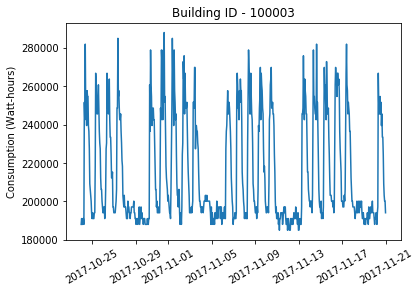

In [32]:
plot_for_building(100003, 'consumption')

Observations - 
* The time series is stationary (verified from Dickey-Fuller test below)
* There is a daily seasonality in the data which confirms the fact that the energy consumption peaks during the day and goes down during the night.
* Also there is a weekly seasonality where the energy consumption is high during weekdays and low on weekends suggesting that the building might be a factory. 

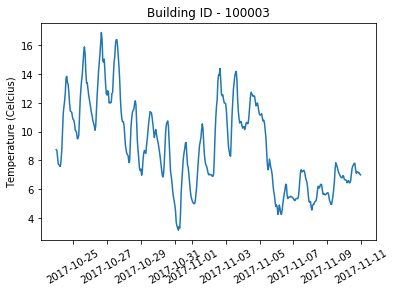

In [33]:
plot_for_building(100003, 'temperature')

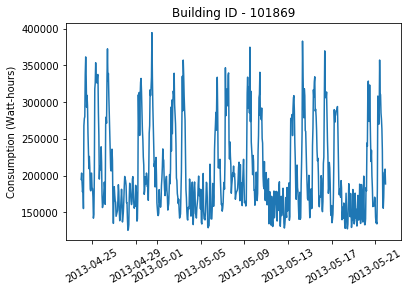

In [34]:
plot_for_building(101869, 'consumption')

# Stationarity Check

In [112]:
from statsmodels.tsa.stattools import adfuller

In [45]:
def adfuller_test(id):
    X = train[train.series_id == id]\
        .drop(['series_id','temperature'], axis = 1)\
        .sort_values('timestamp')\
        .set_index('timestamp')
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [116]:
adfuller_test(100043)

ADF Statistic: -4.129947
p-value: 0.000864
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


* The ADF statistic is highly negative and the p-value is very small. This means the series is stationary

# Auto-correlation

In [121]:
from statsmodels.stats.stattools import durbin_watson

In [131]:
def dw_test(id):
    X = train[train.series_id == id]\
        .drop(['series_id','temperature'], axis = 1)\
        .sort_values('timestamp')\
        .set_index('timestamp')
    result = durbin_watson(X)
    print('DW Statistic: %f' % result[0])

In [132]:
dw_test(100003)

DW Statistic: 0.003351


* DW statistic is very close to 0 which means a positive autocorrelation

# ACF and PACF

In [124]:
from statsmodels.tsa.stattools import acf, pacf

In [141]:
def acf_pacf(id):
    X = train[train.series_id == id].drop(['series_id','temperature'], axis = 1).sort_values('timestamp').set_index('timestamp')
    acf_val = acf(X)
    pacf_val = pacf(X)
    pd.Series(acf_val).plot()
    print(pacf_val)

[ 1.          0.89550433 -0.0213069  -0.27144331 -0.01402812 -0.13523055
 -0.01312097 -0.1487611  -0.1692716  -0.07568284  0.01659872 -0.00496287
  0.08434979  0.19206665  0.17460712  0.12915773  0.10992852  0.09374706
  0.00291937 -0.03670422  0.06895147  0.05116277  0.17601095  0.03518945
  0.08167682 -0.32354338 -0.20589961 -0.03685965  0.0322141   0.04010419
  0.03486436 -0.07696816 -0.02362459  0.01754455 -0.04343046 -0.0268765
 -0.07894012 -0.00684831 -0.06596449 -0.06826191 -0.02153801]


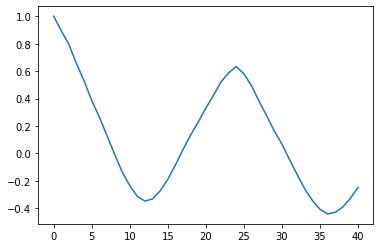

In [142]:
acf_pacf(100003)

In [38]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [46]:
X = train[train.series_id == 100003]\
    .drop(['series_id','temperature'], axis = 1)\
    .sort_values('timestamp')\
    .set_index('timestamp')

In [47]:
X.head()

,consumption
timestamp,
2017-10-24 00:00:00+00:00,187969.954324
2017-10-24 01:00:00+00:00,191001.727781
2017-10-24 02:00:00+00:00,187969.954324
2017-10-24 03:00:00+00:00,187969.954324
2017-10-24 04:00:00+00:00,191001.727781


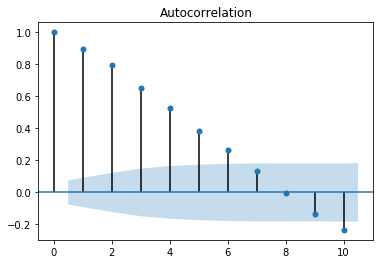

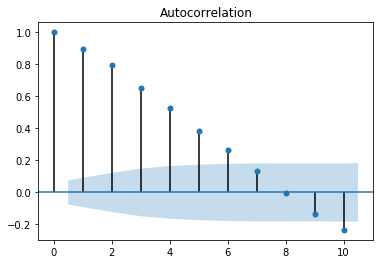

In [125]:
plot_acf(X, lags = 10)

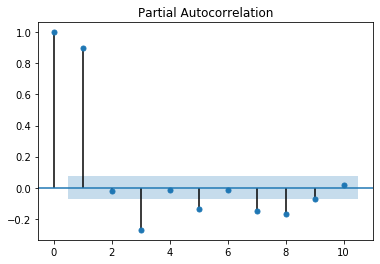

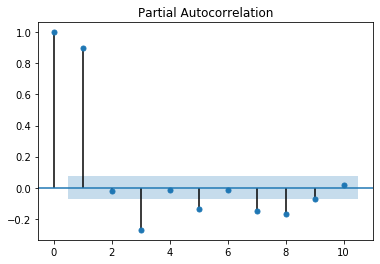

In [126]:
plot_pacf(X, lags = 10)

# Time Series using fbProphet

In [92]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [ ]:
model = Prophet()

In [93]:
train.head()

,series_id,timestamp,consumption,temperature,year,month,day,hour,dayofweek
165789,100003,2017-10-24 00:00:00+00:00,187969.954324,8.75,2017,10,24,0,1
265853,100003,2017-10-24 01:00:00+00:00,191001.727781,8.70,2017,10,24,1,1
391403,100003,2017-10-24 02:00:00+00:00,187969.954324,8.20,2017,10,24,2,1
188521,100003,2017-10-24 03:00:00+00:00,187969.954324,7.75,2017,10,24,3,1
22522,100003,2017-10-24 04:00:00+00:00,191001.727781,7.70,2017,10,24,4,1


In [67]:
train.iloc[88280:88290,:]

,series_id,timestamp,consumption,temperature,year,month,day,hour,dayofweek
495424,100684,2015-06-20 08:00:00+00:00,303384.577537,NaN,2015,6,20,8,5
433855,100684,2015-06-20 09:00:00+00:00,214231.022986,NaN,2015,6,20,9,5
187805,100684,2015-06-20 10:00:00+00:00,203881.335896,NaN,2015,6,20,10,5
480949,100684,2015-06-20 11:00:00+00:00,216729.384951,NaN,2015,6,20,11,5
269426,100684,2015-06-20 12:00:00+00:00,164629.397631,NaN,2015,6,20,12,5
30565,100684,2015-06-20 13:00:00+00:00,190044.254244,NaN,2015,6,20,13,5
432160,100684,2015-06-20 14:00:00+00:00,172944.771226,NaN,2015,6,20,14,5
59877,100684,2015-06-20 15:00:00+00:00,201907.958059,NaN,2015,6,20,15,5
15618,100684,2015-06-20 16:00:00+00:00,192266.062070,NaN,2015,6,20,16,5
444993,100684,2015-06-20 17:00:00+00:00,193133.223352,NaN,2015,6,20,17,5


# Supervised Learning

## Feature Engineering

In [292]:
train.head()

,series_id,timestamp,consumption,temperature
165789,100003,2017-10-24 00:00:00+00:00,187969.954324,8.75
265853,100003,2017-10-24 01:00:00+00:00,191001.727781,8.70
391403,100003,2017-10-24 02:00:00+00:00,187969.954324,8.20
188521,100003,2017-10-24 03:00:00+00:00,187969.954324,7.75
22522,100003,2017-10-24 04:00:00+00:00,191001.727781,7.70


In [117]:
def new_feats(df_in):
    df = df_in.copy()
    df['year'] = df['timestamp'].dt.year
    df['month'] = df['timestamp'].dt.month
    df['day'] = df['timestamp'].dt.day
    df['hour'] = df['timestamp'].dt.hour
    df['dayofweek'] = df['timestamp'].dt.dayofweek
    return df

In [118]:
train_new = new_feats(train)
test_new = new_feats(test)
preds_new = new_feats(preds)

In [119]:
train_new.head()

,series_id,timestamp,consumption,temperature,year,month,day,hour,dayofweek
165789,100003,2017-10-24 00:00:00+00:00,187969.954324,8.75,2017,10,24,0,1
265853,100003,2017-10-24 01:00:00+00:00,191001.727781,8.70,2017,10,24,1,1
391403,100003,2017-10-24 02:00:00+00:00,187969.954324,8.20,2017,10,24,2,1
188521,100003,2017-10-24 03:00:00+00:00,187969.954324,7.75,2017,10,24,3,1
22522,100003,2017-10-24 04:00:00+00:00,191001.727781,7.70,2017,10,24,4,1


In [120]:
train.head()

,series_id,timestamp,consumption,temperature
165789,100003,2017-10-24 00:00:00+00:00,187969.954324,8.75
265853,100003,2017-10-24 01:00:00+00:00,191001.727781,8.70
391403,100003,2017-10-24 02:00:00+00:00,187969.954324,8.20
188521,100003,2017-10-24 03:00:00+00:00,187969.954324,7.75
22522,100003,2017-10-24 04:00:00+00:00,191001.727781,7.70


In [171]:
preds_new.head()

,pred_id,series_id,timestamp,temperature,consumption,prediction_window,year,month,day,hour,dayofweek
803,2614,100004,2015-07-10 00:00:00+00:00,28.599320,0.0,weekly,2015,7,10,0,4
7435,2615,100004,2015-07-17 00:00:00+00:00,28.361151,0.0,weekly,2015,7,17,0,4
2011,5802,100010,2013-12-04 00:00:00+00:00,NaN,0.0,hourly,2013,12,4,0,2
6866,5803,100010,2013-12-04 01:00:00+00:00,NaN,0.0,hourly,2013,12,4,1,2
761,5804,100010,2013-12-04 02:00:00+00:00,NaN,0.0,hourly,2013,12,4,2,2


In [295]:
building.head()

,series_id,surface,base_temperature,monday_is_day_off,tuesday_is_day_off,wednesday_is_day_off,thursday_is_day_off,friday_is_day_off,saturday_is_day_off,sunday_is_day_off
991,100003,x-large,low,False,False,False,False,False,True,True
558,100004,x-large,low,False,False,False,False,False,True,True
639,100006,x-small,low,False,False,False,False,False,True,True
1054,100008,x-small,low,False,False,False,False,False,True,True
143,100010,x-small,low,False,False,False,False,False,True,True


In [54]:
def transform_building_data(df):
    series_id = np.repeat(building.series_id, 7)
    dayofweek = list(range(7)) * len(building)
    isdayoff = building.iloc[:,3:].values.flatten()
    trns_df = pd.DataFrame({"series_id":series_id,"dayofweek":dayofweek,"isdayoff":isdayoff})
    return trns_df.reset_index(drop=True)

In [55]:
building_transformed = transform_building_data(building)

In [56]:
building_transformed.head()

,series_id,dayofweek,isdayoff
0,100003,0,False
1,100003,1,False
2,100003,2,False
3,100003,3,False
4,100003,4,False


In [298]:
# building_transformed.dayofweek.value_counts()

# len(train) / len(building_transformed)

# train.dayofweek.value_counts()

# train.series_id.nunique()

# 72768 / 758

In [19]:
building.iloc[:,:3].head()

,series_id,surface,base_temperature
991,100003,x-large,low
558,100004,x-large,low
639,100006,x-small,low
1054,100008,x-small,low
143,100010,x-small,low


In [57]:
surface_mapper = {
    "xx-small":0,
    "x-small":1,
    "small":2,
    "medium":3,
    "large":4,
    "x-large":5,
    "xx-large":6,
}
base_temperature_mapper = {
    "low":0,
    "high":1
}

In [58]:
def transform_train_test_data(df):
    df_join = pd.merge(df,building_transformed, on = ['series_id','dayofweek'])
    df_join_1 = pd.merge(df_join,building.iloc[:,:3], on = ['series_id'])
    df_join_1['surface'] = df_join_1['surface'].map(lambda x: surface_mapper[x])
    df_join_1['base_temperature'] = df_join_1['base_temperature'].map(lambda x: base_temperature_mapper[x])
    return df_join_1

In [59]:
train_transformed = transform_train_test_data(train_new)
test_transformed = transform_train_test_data(test_new)
preds_transformed = transform_train_test_data(preds_new)

In [68]:
train_transformed.iloc[88280:88290,:]

,series_id,timestamp,consumption,temperature,year,month,day,hour,dayofweek,isdayoff,surface,base_temperature
88280,100684,2015-06-26 08:00:00+00:00,170985.455463,NaN,2015,6,26,8,4,False,1,0
88281,100684,2015-06-26 09:00:00+00:00,175363.448100,NaN,2015,6,26,9,4,False,1,0
88282,100684,2015-06-26 10:00:00+00:00,0.000000,NaN,2015,6,26,10,4,False,1,0
88283,100684,2015-06-26 11:00:00+00:00,0.000000,NaN,2015,6,26,11,4,False,1,0
88284,100684,2015-06-26 12:00:00+00:00,0.000000,NaN,2015,6,26,12,4,False,1,0
88285,100684,2015-06-26 13:00:00+00:00,41753.815749,NaN,2015,6,26,13,4,False,1,0
88286,100684,2015-06-26 14:00:00+00:00,131452.275701,NaN,2015,6,26,14,4,False,1,0
88287,100684,2015-06-26 15:00:00+00:00,104921.827816,NaN,2015,6,26,15,4,False,1,0
88288,100684,2015-06-26 16:00:00+00:00,265295.104126,NaN,2015,6,26,16,4,False,1,0
88289,100684,2015-06-26 17:00:00+00:00,197951.827668,NaN,2015,6,26,17,4,False,1,0


In [173]:
preds_transformed.head()

,pred_id,series_id,timestamp,temperature,consumption,prediction_window,year,month,day,hour,dayofweek,isdayoff,surface,base_temperature
0,2614,100004,2015-07-10 00:00:00+00:00,28.599320,0.0,weekly,2015,7,10,0,4,False,5,0
1,2615,100004,2015-07-17 00:00:00+00:00,28.361151,0.0,weekly,2015,7,17,0,4,False,5,0
2,5802,100010,2013-12-04 00:00:00+00:00,NaN,0.0,hourly,2013,12,4,0,2,False,1,0
3,5803,100010,2013-12-04 01:00:00+00:00,NaN,0.0,hourly,2013,12,4,1,2,False,1,0
4,5804,100010,2013-12-04 02:00:00+00:00,NaN,0.0,hourly,2013,12,4,2,2,False,1,0


In [61]:
req_cols = [col for col in train_transformed.columns 
            if col not in ['series_id','timestamp','temperature']]
pred_cols = [col for col in preds_transformed.columns 
             if col not in ['series_id','timestamp','temperature','pred_id','prediction_window','consumption']]

In [62]:
train_transformed_sel = train_transformed[req_cols]
test_transformed_sel = test_transformed[req_cols]
preds_transformed_sel = preds_transformed[pred_cols]

In [63]:
train_transformed_sel.head()

,consumption,year,month,day,hour,dayofweek,isdayoff,surface,base_temperature
0,187969.954324,2017,10,24,0,1,False,5,0
1,191001.727781,2017,10,24,1,1,False,5,0
2,187969.954324,2017,10,24,2,1,False,5,0
3,187969.954324,2017,10,24,3,1,False,5,0
4,191001.727781,2017,10,24,4,1,False,5,0


In [177]:
preds_transformed_sel.head()

,year,month,day,hour,dayofweek,isdayoff,surface,base_temperature
0,2015,7,10,0,4,False,5,0
1,2015,7,17,0,4,False,5,0
2,2013,12,4,0,2,False,1,0
3,2013,12,4,1,2,False,1,0
4,2013,12,4,2,2,False,1,0


In [27]:
train_transformed_sel.isna().sum()

consumption         0
year                0
month               0
day                 0
hour                0
dayofweek           0
isdayoff            0
surface             0
base_temperature    0
dtype: int64

In [28]:
test_transformed_sel.isna().sum()

consumption         0
year                0
month               0
day                 0
hour                0
dayofweek           0
isdayoff            0
surface             0
base_temperature    0
dtype: int64

In [29]:
train_transformed_sel.iloc[88280:88290,:]

,consumption,year,month,day,hour,dayofweek,isdayoff,surface,base_temperature
88280,170985.455463,2015,6,26,8,4,False,1,0
88281,175363.448100,2015,6,26,9,4,False,1,0
88282,0.000000,2015,6,26,10,4,False,1,0
88283,0.000000,2015,6,26,11,4,False,1,0
88284,0.000000,2015,6,26,12,4,False,1,0
88285,41753.815749,2015,6,26,13,4,False,1,0
88286,131452.275701,2015,6,26,14,4,False,1,0
88287,104921.827816,2015,6,26,15,4,False,1,0
88288,265295.104126,2015,6,26,16,4,False,1,0
88289,197951.827668,2015,6,26,17,4,False,1,0


# One-Hot Encoding

In [64]:
def ohe(df,dftype='test'):
    year = pd.get_dummies(df.year, prefix='year')
#     month = pd.get_dummies(df.month, prefix='month')
    dayofweek = pd.get_dummies(df.dayofweek, prefix='dayofweek')
    isdayoff = pd.get_dummies(df.isdayoff, prefix='isdayoff')
    surface = pd.get_dummies(df.surface, prefix='surface')
    base_temperature = pd.get_dummies(df.base_temperature, prefix='base_temperature')
    rem_df = df[['month','day','hour']]
    final_df = pd.concat([year,rem_df,dayofweek,isdayoff,surface,base_temperature], axis = 1)
    if dftype == 'train':
        year_2012 = pd.DataFrame({'year_2012':[0]*len(final_df)})
        final_df = pd.concat([year_2012,final_df], axis = 1)
    return final_df

In [70]:
X_train = ohe(train_transformed_sel,'train')
X_test = ohe(test_transformed_sel)

In [78]:
y_train = train_transformed_sel.consumption
y_test = test_transformed_sel.consumption

In [72]:
X_train.head()

,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,month,day,hour,dayofweek_0,...,isdayoff_True,surface_0,surface_1,surface_2,surface_3,surface_4,surface_5,surface_6,base_temperature_0,base_temperature_1
0,0,0,0,0,0,1,10,24,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,1,10,24,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,1,10,24,2,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,1,10,24,3,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,1,10,24,4,0,...,0,0,0,0,0,0,1,0,1,0


In [128]:
X_test.head()

,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,month,day,hour,dayofweek_0,...,isdayoff_True,surface_0,surface_1,surface_2,surface_3,surface_4,surface_5,surface_6,base_temperature_0,base_temperature_1
0,0,0,0,1,0,0,6,30,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,6,30,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,1,0,0,6,30,2,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,1,0,0,6,30,3,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,0,1,0,0,6,30,4,0,...,0,0,0,0,0,0,1,0,1,0


In [129]:
y_test.head()

0    302766.211597
1    295668.298399
2    265999.958249
3    208346.006546
4    222826.842658
Name: consumption, dtype: float64

In [74]:
X_forecast.head()

,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,month,day,hour,dayofweek_0,...,isdayoff_True,surface_0,surface_1,surface_2,surface_3,surface_4,surface_5,surface_6,base_temperature_0,base_temperature_1
0,0,0,0,1,0,0,7,10,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,7,17,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,12,4,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,1,0,0,0,0,12,4,1,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,12,4,2,0,...,0,0,1,0,0,0,0,0,1,0


# Training and Testing Data

In [79]:
y_train.head()

0    187969.954324
1    191001.727781
2    187969.954324
3    187969.954324
4    191001.727781
Name: consumption, dtype: float64

# Grid Search CV

In [153]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [6, 7, 8, 9],
#     'n_estimators': [400, 600, 800, 1000]
# }

# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)

# grid_search.fit(X_train, y_train)
# grid_search.best_params_

# Random Forest Regression

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rf = RandomForestRegressor(random_state=42)

In [101]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [81]:
rf.feature_importances_

array([0.        , 0.00171207, 0.00757357, 0.03074284, 0.01657385,
       0.0847412 , 0.17553701, 0.18678632, 0.18565219, 0.01292247,
       0.00986798, 0.0104487 , 0.01076859, 0.01215379, 0.0100464 ,
       0.012069  , 0.0137366 , 0.02121223, 0.00223879, 0.01623263,
       0.02272378, 0.00230579, 0.08710015, 0.00967173, 0.05210492,
       0.00092105, 0.00415636])

(array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ]),
 <a list of 9 Text xticklabel objects>)

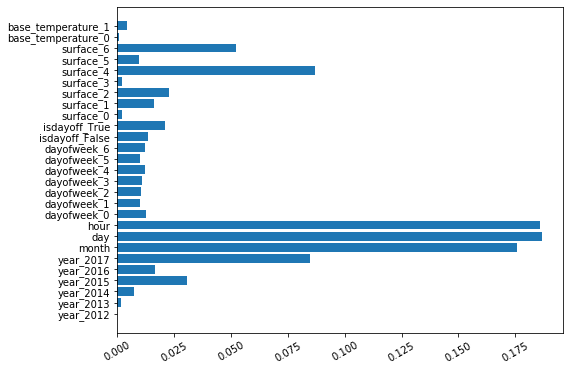

In [84]:
plt.figure(figsize=(8,6))
plt.barh(X_train.columns, rf.feature_importances_)
plt.xticks(rotation = 30)

In [85]:
# imp_cols = ['year_2017','month','day','hour','surface_4','surface_6']

# rf.fit(X_train[imp_cols], y_train)

# Training Prediction

In [102]:
y_train_pred = rf.predict(X_train)

In [103]:
train_pred_rf = pd.DataFrame({"y":y_train,"yhat":y_train_pred})
train_pred_rf.head()

,y,yhat
0,187969.954324,115051.465854
1,191001.727781,104964.700153
2,187969.954324,126079.721390
3,187969.954324,105645.803870
4,191001.727781,112036.854207


In [156]:
# X_train_1 = X_train_ohe.copy()
# X_train_1['y'] = y_train
# X_train_1['yhat'] = y_train_pred

# X_train_1.head()

# Training Error

In [91]:
def rmse(y,yhat):
    return (np.mean((y - yhat) **2))**0.5

def mae(y,yhat):
    return np.mean(100 * np.abs(y - yhat))

In [104]:
rmse(train_pred_rf.y, train_pred_rf.yhat)

116275.55174958394

In [93]:
mae(train_pred_rf.y.values, train_pred_rf.yhat.values)

8462447.869364059

In [157]:
# rmse(X_train_1.y, X_train_1.yhat)

116275.61700296913

In [366]:
# len([i for i in range(len(X_train_1.y)) if X_train_1.y[i] == 0])

In [ ]:
mae(X_train_1.y.values, X_train_1.yhat.values)

In [158]:
X_train_comb = pd.concat([train_transformed[['timestamp','series_id']],X_train_1.iloc[:,-2:]], axis = 1)

In [159]:
X_train_comb[88280:88290]

,timestamp,series_id,y,yhat
88280,2015-06-26 08:00:00+00:00,100684,170985.455463,151118.392137
88281,2015-06-26 09:00:00+00:00,100684,175363.448100,171710.792339
88282,2015-06-26 10:00:00+00:00,100684,0.000000,98046.566566
88283,2015-06-26 11:00:00+00:00,100684,0.000000,107590.134923
88284,2015-06-26 12:00:00+00:00,100684,0.000000,88024.272557
88285,2015-06-26 13:00:00+00:00,100684,41753.815749,114922.624995
88286,2015-06-26 14:00:00+00:00,100684,131452.275701,159571.262826
88287,2015-06-26 15:00:00+00:00,100684,104921.827816,148400.300447
88288,2015-06-26 16:00:00+00:00,100684,265295.104126,218609.816095
88289,2015-06-26 17:00:00+00:00,100684,197951.827668,194480.519829


In [160]:
X_train_comb.loc[X_train_comb.series_id == 100003, ['timestamp','y','yhat']]

,timestamp,y,yhat
0,2017-10-24 00:00:00+00:00,187969.954324,115051.465854
1,2017-10-24 01:00:00+00:00,191001.727781,104964.700153
2,2017-10-24 02:00:00+00:00,187969.954324,126079.721390
3,2017-10-24 03:00:00+00:00,187969.954324,105645.803870
4,2017-10-24 04:00:00+00:00,191001.727781,112036.854207
...,...,...,...
667,2017-11-20 19:00:00+00:00,209192.368522,201389.425722
668,2017-11-20 20:00:00+00:00,203128.821608,179061.213733
669,2017-11-20 21:00:00+00:00,200097.048151,173158.950435
670,2017-11-20 22:00:00+00:00,200097.048151,190685.680065


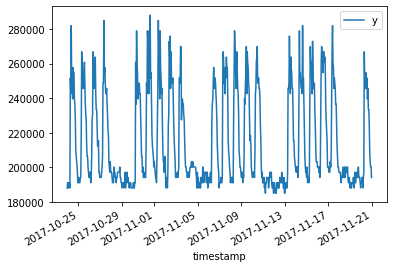

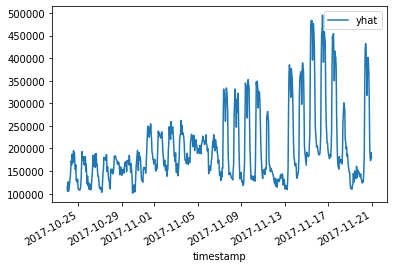

In [137]:
X_train_comb.loc[X_train_comb.series_id == 100003, ['timestamp','y']].set_index('timestamp').plot()
X_train_comb.loc[X_train_comb.series_id == 100003, ['timestamp','yhat']].set_index('timestamp').plot()

In [410]:
def plot_forecast_for_building(id, df, col_y, col_yhat):
    y = df.loc[df.series_id == id, ['timestamp',col_y]].set_index('timestamp')
    yhat = df.loc[df.series_id == id, ['timestamp',col_yhat]].set_index('timestamp')
#     print(train_filt.head())
#     plt.figure(figsize=(10,7))
#     df_filt.plot(kind = 'line', x = 'timestamp', y = col_y, figsize=(10,7))
#     df_filt.plot(kind = 'line', x = 'timestamp', y = col_yhat, figsize=(10,7), color = 'r')
#     plt.plot(y)
#     plt.plot(yhat)
#     plt.xticks(rotation = 30)
    print(y)

In [411]:
plot_forecast_for_building(100003, X_train_comb, 'y', 'yhat')

                                       y
timestamp                               
2017-10-24 00:00:00+00:00  187969.954324
2017-10-24 01:00:00+00:00  191001.727781
2017-10-24 02:00:00+00:00  187969.954324
2017-10-24 03:00:00+00:00  187969.954324
2017-10-24 04:00:00+00:00  191001.727781
...                                  ...
2017-11-20 19:00:00+00:00  209192.368522
2017-11-20 20:00:00+00:00  203128.821608
2017-11-20 21:00:00+00:00  200097.048151
2017-11-20 22:00:00+00:00  200097.048151
2017-11-20 23:00:00+00:00  194033.501238

[672 rows x 1 columns]


In [67]:
X_train.head()

,year,month,day,hour,dayofweek,isdayoff,surface,base_temperature,y,yhat
0,2017,10,24,0,1,False,5,0,187969.954324,188022.803086
1,2017,10,24,1,1,False,5,0,191001.727781,191002.829294
2,2017,10,24,2,1,False,5,0,187969.954324,188022.803086
3,2017,10,24,3,1,False,5,0,187969.954324,188022.803086
4,2017,10,24,4,1,False,5,0,191001.727781,191002.829294


In [66]:
X_test.head()

,year,month,day,hour,dayofweek,isdayoff,surface,base_temperature
0,2015,6,30,0,1,False,5,0
1,2015,6,30,1,1,False,5,0
2,2015,6,30,2,1,False,5,0
3,2015,6,30,3,1,False,5,0
4,2015,6,30,4,1,False,5,0


# Testing

In [106]:
y_test_pred = rf.predict(X_test)

In [107]:
test_pred_rf = pd.DataFrame({"y":y_test,"yhat":y_test_pred})
test_pred_rf.head()

,y,yhat
0,302766.211597,30901.497463
1,295668.298399,32063.731253
2,265999.958249,29590.587273
3,208346.006546,32531.289731
4,222826.842658,37956.805692


In [165]:
# X_test_1 = X_test_ohe.copy()
# X_test_1['y'] = y_test
# X_test_1['yhat'] = y_test_pred

# X_test_1.head()

# Testing Error

In [108]:
rmse(test_pred_rf.y.values, test_pred_rf.yhat.values)

523904.1369449762

In [109]:
mae(test_pred_rf.y.values, test_pred_rf.yhat.values)

17936338.579959244

In [167]:
# rmse(X_test_1.y.values, X_test_1.yhat.values)

523904.1369449762

In [168]:
# mae(X_test_1.y.values, X_test_1.yhat.values)

17936338.579959244

# Forecasting

In [73]:
X_forecast = ohe(preds_transformed_sel)

In [113]:
test.head()

,series_id,timestamp,consumption,temperature,year,month,day,hour,dayofweek
44048,100004,2015-06-30 00:00:00+00:00,302766.211597,24.000000,2015,6,30,0,1
81968,100004,2015-06-30 01:00:00+00:00,295668.298399,23.333333,2015,6,30,1,1
108984,100004,2015-06-30 02:00:00+00:00,265999.958249,21.300000,2015,6,30,2,1
10680,100004,2015-06-30 03:00:00+00:00,208346.006546,21.000000,2015,6,30,3,1
40329,100004,2015-06-30 04:00:00+00:00,222826.842658,21.000000,2015,6,30,4,1


In [110]:
X_forecast.head()

,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,month,day,hour,dayofweek_0,...,isdayoff_True,surface_0,surface_1,surface_2,surface_3,surface_4,surface_5,surface_6,base_temperature_0,base_temperature_1
0,0,0,0,1,0,0,7,10,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,7,17,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,12,4,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,1,0,0,0,0,12,4,1,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,12,4,2,0,...,0,0,1,0,0,0,0,0,1,0


In [121]:
preds.head()

,pred_id,series_id,timestamp,temperature,consumption,prediction_window
803,2614,100004,2015-07-10 00:00:00+00:00,28.599320,0.0,weekly
7435,2615,100004,2015-07-17 00:00:00+00:00,28.361151,0.0,weekly
2011,5802,100010,2013-12-04 00:00:00+00:00,NaN,0.0,hourly
6866,5803,100010,2013-12-04 01:00:00+00:00,NaN,0.0,hourly
761,5804,100010,2013-12-04 02:00:00+00:00,NaN,0.0,hourly


In [122]:
y_forecast = rf.predict(X_forecast)

In [127]:
forecast_df = preds.copy()
forecast_df['consumption'] = y_forecast
forecast_df.sort_values('pred_id', inplace = True)
forecast_df.head()

,pred_id,series_id,timestamp,temperature,consumption,prediction_window
3086,0,102781,2013-03-03 00:00:00+00:00,19.931250,284921.408506,daily
2476,1,102781,2013-03-04 00:00:00+00:00,20.034375,103050.511783,daily
3593,2,102781,2013-03-05 00:00:00+00:00,19.189583,109041.155807,daily
2947,3,102781,2013-03-06 00:00:00+00:00,18.397917,104258.657734,daily
2544,4,102781,2013-03-07 00:00:00+00:00,20.762500,102855.183242,daily


In [189]:
forecast_df.head(20)

,pred_id,series_id,timestamp,temperature,consumption,prediction_window
3086,0,102781,2013-03-03 00:00:00+00:00,19.931250,284921.408506,daily
2476,1,102781,2013-03-04 00:00:00+00:00,20.034375,103050.511783,daily
3593,2,102781,2013-03-05 00:00:00+00:00,19.189583,109041.155807,daily
2947,3,102781,2013-03-06 00:00:00+00:00,18.397917,104258.657734,daily
2544,4,102781,2013-03-07 00:00:00+00:00,20.762500,102855.183242,daily
4929,5,102781,2013-03-08 00:00:00+00:00,19.800000,102077.664481,daily
5561,6,102781,2013-03-09 00:00:00+00:00,20.466667,189145.795847,daily
425,7,103342,2013-06-26 00:00:00+00:00,10.486607,103673.631065,weekly
84,8,103342,2013-07-03 00:00:00+00:00,10.006548,269036.616064,weekly
2908,9,102969,2013-12-15 00:00:00+00:00,20.214583,82646.558258,daily


# CatBoost

In [94]:
from catboost import CatBoostRegressor

In [100]:
model=CatBoostRegressor(iterations=50, depth=15, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 158332.8739849	test: 528298.8870871	best: 528298.8870871 (0)	total: 463ms	remaining: 22.7s
1:	learn: 154544.4044982	test: 526883.8854448	best: 526883.8854448 (1)	total: 865ms	remaining: 20.7s
2:	learn: 151317.2463175	test: 525253.3556330	best: 525253.3556330 (2)	total: 1.3s	remaining: 20.5s
3:	learn: 148545.3179966	test: 524078.1291791	best: 524078.1291791 (3)	total: 1.79s	remaining: 20.6s
4:	learn: 146320.9065996	test: 523174.5286881	best: 523174.5286881 (4)	total: 2.28s	remaining: 20.5s
5:	learn: 144205.9153069	test: 522671.2242593	best: 522671.2242593 (5)	total: 2.82s	remaining: 20.7s
6:	learn: 142511.6477515	test: 521887.1016817	best: 521887.1016817 (6)	total: 3.27s	remaining: 20.1s
7:	learn: 140884.2174472	test: 521248.4204722	best: 521248.4204722 (7)	total: 3.77s	remaining: 19.8s
8:	learn: 139563.2568455	test: 520982.3292581	best: 520982.3292581 (8)	total: 4.24s	remaining: 19.3s
9:	learn: 138444.2696935	test: 520337.7510323	best: 520337.7510323 (9)	total: 4.67s	remainin

In [102]:
train_pred_catboost = pd.DataFrame({"y":y_train,"yhat":model.predict(X_train)})

In [103]:
train_pred_catboost

,y,yhat
0,187969.954324,100147.810863
1,191001.727781,100147.810863
2,187969.954324,100147.810863
3,187969.954324,100147.810863
4,191001.727781,100147.810863
...,...,...
509371,137896.394678,105078.110981
509372,109257.180367,86168.399993
509373,61335.525892,68018.242652
509374,51933.839229,68018.242652
